# Data Cleaning, Manipulation, and Analysis

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date, time


#import os
#import zipfile
import scipy
from scipy import stats
#from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
#from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, Binarizer
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine

from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, DropMissingData, MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer, RandomSampleImputer

from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper, OutlierTrimmer

from feature_engine.encoding import CountFrequencyEncoder, DecisionTreeEncoder, MeanEncoder, OneHotEncoder
from feature_engine.encoding import OrdinalEncoder, WoEEncoder, RareLabelEncoder, StringSimilarityEncoder

from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, ArbitraryDiscretiser
from feature_engine.discretisation import DecisionTreeDiscretiser, EqualWidthDiscretiser

from feature_engine.datetime import DatetimeFeatures

from feature_engine.creation import CyclicalFeatures, MathFeatures, RelativeFeatures


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Data Quick Glance

To finish this lab, you will utilize the provided files for analysis:

- appointment_data.csv: This file contains details about appointment schedules, patient IDs, dates, and appointment times.

- feedback_data.csv: Use this document to include patient satisfaction survey data with feedback scores and comments.

- resource_data.csv: This document provides details on resource allocation, department utilization, and availability.


In [2]:
df1 = pd.read_csv("appointmentdata.csv", sep="\t", parse_dates=["Date"])

In [3]:
df1.head()

,AppointmentID,PatientID,DoctorID,Department,Date,Time,Status
0,NaN,P96099,D26,Cardiology,1/1/2024,NaN,NaN
1,A7515,P16262,D1,Orthopedics,10/9/2024,13:00,No Show
2,A7537,P99601,D30,Cardiology,17/12/2024,15:00,Completed
3,A8866,P55235,D30,Neurology,9/7/2024,15:30,Rescheduled
4,A3039,P93372,D23,Pediatric,12/8/2024,18:00,Cancelled


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AppointmentID  189 non-null    object
 1   PatientID      200 non-null    object
 2   DoctorID       199 non-null    object
 3   Department     199 non-null    object
 4   Date           198 non-null    object
 5   Time           191 non-null    object
 6   Status         191 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [5]:
df1.isnull().sum()

AppointmentID    11
PatientID         0
DoctorID          1
Department        1
Date              2
Time              9
Status            9
dtype: int64

In [6]:
df1.dropna(inplace=True)

In [7]:
df1

,AppointmentID,PatientID,DoctorID,Department,Date,Time,Status
1,A7515,P16262,D1,Orthopedics,10/9/2024,13:00,No Show
2,A7537,P99601,D30,Cardiology,17/12/2024,15:00,Completed
3,A8866,P55235,D30,Neurology,9/7/2024,15:30,Rescheduled
4,A3039,P93372,D23,Pediatric,12/8/2024,18:00,Cancelled
5,A3237,P84444,D1,Pediatric,6/3/2024,17:30,Rescheduled
...,...,...,...,...,...,...,...
194,A9632,P30694,D27,General Medicine,26/3/2024,9:30,Cancelled
195,A1765,P59755,D15,General Medicine,19/12/2024,9:00,No Show
196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show
197,A5220,P67482,D10,Oncology,20/5/2024,11:30,No Show


In [8]:
df1.reset_index(inplace=True)

In [9]:
df1

,index,AppointmentID,PatientID,DoctorID,Department,Date,Time,Status
0,1,A7515,P16262,D1,Orthopedics,10/9/2024,13:00,No Show
1,2,A7537,P99601,D30,Cardiology,17/12/2024,15:00,Completed
2,3,A8866,P55235,D30,Neurology,9/7/2024,15:30,Rescheduled
3,4,A3039,P93372,D23,Pediatric,12/8/2024,18:00,Cancelled
4,5,A3237,P84444,D1,Pediatric,6/3/2024,17:30,Rescheduled
...,...,...,...,...,...,...,...,...
184,194,A9632,P30694,D27,General Medicine,26/3/2024,9:30,Cancelled
185,195,A1765,P59755,D15,General Medicine,19/12/2024,9:00,No Show
186,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show
187,197,A5220,P67482,D10,Oncology,20/5/2024,11:30,No Show


In [10]:
df1.duplicated().sum()

0

In [11]:
#df1.to_csv("Cleaned_Appointment.csv", index=False)

In [12]:
df2 = pd.read_csv("feedbackdata.csv", sep="\t")

In [13]:
df2.head()

,FeedbackID,PatientID,Department,Feedback Score,Comments,WaitTime
0,F1000,P99601,Cardiology,4.00,Delayed response,45.00
1,F1001,P36565,Orthopedics,3.00,Needs improvement,45.00
2,F1002,P99601,NaN,NaN,Excellent care,30.00
3,F1003,P67499,Neurology,9.00,Amazing team,30.00
4,F1004,P49994,Pediatric,8.00,Great doctors,45.00


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FeedbackID      198 non-null    object 
 1   PatientID       198 non-null    object 
 2   Department      191 non-null    object 
 3   Feedback Score  192 non-null    float64
 4   Comments        196 non-null    object 
 5   WaitTime        195 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.4+ KB


In [15]:
df2.isnull().sum()

FeedbackID        0
PatientID         0
Department        7
Feedback Score    6
Comments          2
WaitTime          3
dtype: int64

In [16]:
df2.dropna(inplace=True)

In [17]:
df2.reset_index(inplace=True)

In [18]:
df2.duplicated().sum()

0

In [19]:
df2

,index,FeedbackID,PatientID,Department,Feedback Score,Comments,WaitTime
0,0,F1000,P99601,Cardiology,4.00,Delayed response,45.00
1,1,F1001,P36565,Orthopedics,3.00,Needs improvement,45.00
2,3,F1003,P67499,Neurology,9.00,Amazing team,30.00
3,4,F1004,P49994,Pediatric,8.00,Great doctors,45.00
4,5,F1005,P31843,Pediatric,5.00,Satisfactory,45.00
...,...,...,...,...,...,...,...
186,192,F1194,P10797,Neurology,8.00,Efficient process,45.00
187,193,F1195,P30694,General Medicine,6.00,Very good,45.00
188,195,F1197,P80770,Oncology,3.00,Needs improvement,45.00
189,196,F1198,P67482,Oncology,9.00,Amazing team,30.00


In [20]:
#df2.to_csv("Cleaned_Feedback.csv", index=False)

In [21]:
df3 = pd.read_csv("resourcedata.csv", sep="\t", parse_dates=["Date"])

In [22]:
df3.head()

,ResourceID,Department,ResourceType,UsageHours,Date,Availability
0,R5487,Cardiology,Nurse,2,2024-07-28,Available
1,R8097,Orthopedics,Doctor,0,2024-09-10,Unavailable
2,R2557,General Medicine,Room,0,2024-12-17,Under Maintenance
3,R9024,Neurology,Doctor,9,2024-07-09,Available
4,R9181,NaN,Room,1,NaT,Available


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ResourceID    210 non-null    object        
 1   Department    211 non-null    object        
 2   ResourceType  209 non-null    object        
 3   UsageHours    213 non-null    int64         
 4   Date          207 non-null    datetime64[ns]
 5   Availability  213 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 10.1+ KB


In [24]:
df3.isnull().sum()

ResourceID      3
Department      2
ResourceType    4
UsageHours      0
Date            6
Availability    0
dtype: int64

In [25]:
df3.dropna(inplace=True)

In [26]:
df3.reset_index(inplace=True)

In [27]:
df3.duplicated().sum()

0

In [28]:
df3

,index,ResourceID,Department,ResourceType,UsageHours,Date,Availability
0,0,R5487,Cardiology,Nurse,2,2024-07-28,Available
1,1,R8097,Orthopedics,Doctor,0,2024-09-10,Unavailable
2,2,R2557,General Medicine,Room,0,2024-12-17,Under Maintenance
3,3,R9024,Neurology,Doctor,9,2024-07-09,Available
4,5,R2629,Oncology,Doctor,4,2024-03-06,Available
...,...,...,...,...,...,...,...
202,208,R1385,Pediatric,Doctor,0,2024-03-26,Unavailable
203,209,R8161,General Medicine,Equipment,1,2024-12-19,Available
204,210,R5806,Pediatric,Doctor,8,2024-03-17,Available
205,211,R1560,Pediatric,Technician,6,2024-05-20,Available


In [29]:
#df3.to_csv("Cleaned_Resource.csv", index=False)

## Pivot Tables

In [30]:
df2

,index,FeedbackID,PatientID,Department,Feedback Score,Comments,WaitTime
0,0,F1000,P99601,Cardiology,4.00,Delayed response,45.00
1,1,F1001,P36565,Orthopedics,3.00,Needs improvement,45.00
2,3,F1003,P67499,Neurology,9.00,Amazing team,30.00
3,4,F1004,P49994,Pediatric,8.00,Great doctors,45.00
4,5,F1005,P31843,Pediatric,5.00,Satisfactory,45.00
...,...,...,...,...,...,...,...
186,192,F1194,P10797,Neurology,8.00,Efficient process,45.00
187,193,F1195,P30694,General Medicine,6.00,Very good,45.00
188,195,F1197,P80770,Oncology,3.00,Needs improvement,45.00
189,196,F1198,P67482,Oncology,9.00,Amazing team,30.00


In [31]:
df1

,index,AppointmentID,PatientID,DoctorID,Department,Date,Time,Status
0,1,A7515,P16262,D1,Orthopedics,10/9/2024,13:00,No Show
1,2,A7537,P99601,D30,Cardiology,17/12/2024,15:00,Completed
2,3,A8866,P55235,D30,Neurology,9/7/2024,15:30,Rescheduled
3,4,A3039,P93372,D23,Pediatric,12/8/2024,18:00,Cancelled
4,5,A3237,P84444,D1,Pediatric,6/3/2024,17:30,Rescheduled
...,...,...,...,...,...,...,...,...
184,194,A9632,P30694,D27,General Medicine,26/3/2024,9:30,Cancelled
185,195,A1765,P59755,D15,General Medicine,19/12/2024,9:00,No Show
186,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show
187,197,A5220,P67482,D10,Oncology,20/5/2024,11:30,No Show


In [32]:
pivot1 = pd.merge(left=df1,right=df2, how="inner", on="PatientID")
pivot1

,index_x,AppointmentID,PatientID,DoctorID,Department_x,Date,Time,Status,index_y,FeedbackID,Department_y,Feedback Score,Comments,WaitTime
0,1,A7515,P16262,D1,Orthopedics,10/9/2024,13:00,No Show,65,F1065,Oncology,9.00,Amazing team,30.00
1,2,A7537,P99601,D30,Cardiology,17/12/2024,15:00,Completed,0,F1000,Cardiology,4.00,Delayed response,45.00
2,3,A8866,P55235,D30,Neurology,9/7/2024,15:30,Rescheduled,98,F1099,Oncology,6.00,Very good,45.00
3,4,A3039,P93372,D23,Pediatric,12/8/2024,18:00,Cancelled,104,F1105,General Medicine,4.00,Delayed response,45.00
4,5,A3237,P84444,D1,Pediatric,6/3/2024,17:30,Rescheduled,153,F1155,Cardiology,8.00,Efficient process,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show,9,F1009,Orthopedics,4.00,Delayed response,45.00
187,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show,127,F1129,Oncology,9.00,Highly recommended,30.00
188,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show,195,F1197,Oncology,3.00,Needs improvement,45.00
189,197,A5220,P67482,D10,Oncology,20/5/2024,11:30,No Show,196,F1198,Oncology,9.00,Amazing team,30.00


In [33]:
# Create "Satisfaction Level" column
pivot1['Satisfaction Level'] = pivot1['Feedback Score'].apply(lambda x: 'High' if x >= 4 else 'Low')

pivot1

,index_x,AppointmentID,PatientID,DoctorID,Department_x,Date,Time,Status,index_y,FeedbackID,Department_y,Feedback Score,Comments,WaitTime,Satisfaction Level
0,1,A7515,P16262,D1,Orthopedics,10/9/2024,13:00,No Show,65,F1065,Oncology,9.00,Amazing team,30.00,High
1,2,A7537,P99601,D30,Cardiology,17/12/2024,15:00,Completed,0,F1000,Cardiology,4.00,Delayed response,45.00,High
2,3,A8866,P55235,D30,Neurology,9/7/2024,15:30,Rescheduled,98,F1099,Oncology,6.00,Very good,45.00,High
3,4,A3039,P93372,D23,Pediatric,12/8/2024,18:00,Cancelled,104,F1105,General Medicine,4.00,Delayed response,45.00,High
4,5,A3237,P84444,D1,Pediatric,6/3/2024,17:30,Rescheduled,153,F1155,Cardiology,8.00,Efficient process,45.00,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show,9,F1009,Orthopedics,4.00,Delayed response,45.00,High
187,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show,127,F1129,Oncology,9.00,Highly recommended,30.00,High
188,196,A3732,P80770,D4,Oncology,17/3/2024,9:00,No Show,195,F1197,Oncology,3.00,Needs improvement,45.00,Low
189,197,A5220,P67482,D10,Oncology,20/5/2024,11:30,No Show,196,F1198,Oncology,9.00,Amazing team,30.00,High


In [34]:
pivot1.columns

Index(['index_x', 'AppointmentID', 'PatientID', 'DoctorID', 'Department_x', 'Date', 'Time', 'Status', 'index_y', 'FeedbackID', 'Department_y', 'Feedback Score', 'Comments', 'WaitTime', 'Satisfaction Level'], dtype='object')

In [35]:
pivot1.drop(['index_x', 'AppointmentID', 'DoctorID', 'index_y', 'FeedbackID', 'Department_y', 'Comments' ], axis=1, inplace=True)

In [36]:
pivot1

,PatientID,Department_x,Date,Time,Status,Feedback Score,WaitTime,Satisfaction Level
0,P16262,Orthopedics,10/9/2024,13:00,No Show,9.00,30.00,High
1,P99601,Cardiology,17/12/2024,15:00,Completed,4.00,45.00,High
2,P55235,Neurology,9/7/2024,15:30,Rescheduled,6.00,45.00,High
3,P93372,Pediatric,12/8/2024,18:00,Cancelled,4.00,45.00,High
4,P84444,Pediatric,6/3/2024,17:30,Rescheduled,8.00,45.00,High
...,...,...,...,...,...,...,...,...
186,P80770,Oncology,17/3/2024,9:00,No Show,4.00,45.00,High
187,P80770,Oncology,17/3/2024,9:00,No Show,9.00,30.00,High
188,P80770,Oncology,17/3/2024,9:00,No Show,3.00,45.00,Low
189,P67482,Oncology,20/5/2024,11:30,No Show,9.00,30.00,High


In [37]:
#pivot1.to_csv("Cleaned_Pivot1.csv", index=False)

In [38]:
pivot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PatientID           191 non-null    object 
 1   Department_x        191 non-null    object 
 2   Date                191 non-null    object 
 3   Time                191 non-null    object 
 4   Status              191 non-null    object 
 5   Feedback Score      191 non-null    float64
 6   WaitTime            191 non-null    float64
 7   Satisfaction Level  191 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.1+ KB


In [39]:
pivot1['Date'] = pd.to_datetime(pivot1['Date'], dayfirst=True).dt.strftime('%m/%d/%Y')

In [40]:
pivot1.head()

,PatientID,Department_x,Date,Time,Status,Feedback Score,WaitTime,Satisfaction Level
0,P16262,Orthopedics,09/10/2024,13:00,No Show,9.00,30.00,High
1,P99601,Cardiology,12/17/2024,15:00,Completed,4.00,45.00,High
2,P55235,Neurology,07/09/2024,15:30,Rescheduled,6.00,45.00,High
3,P93372,Pediatric,08/12/2024,18:00,Cancelled,4.00,45.00,High
4,P84444,Pediatric,03/06/2024,17:30,Rescheduled,8.00,45.00,High


In [41]:
pivot1['Time'] = pd.to_datetime(pivot1['Time'], format='%H:%M').dt.strftime('%I:%M %p')

In [42]:
pivot1.head()

,PatientID,Department_x,Date,Time,Status,Feedback Score,WaitTime,Satisfaction Level
0,P16262,Orthopedics,09/10/2024,01:00 PM,No Show,9.00,30.00,High
1,P99601,Cardiology,12/17/2024,03:00 PM,Completed,4.00,45.00,High
2,P55235,Neurology,07/09/2024,03:30 PM,Rescheduled,6.00,45.00,High
3,P93372,Pediatric,08/12/2024,06:00 PM,Cancelled,4.00,45.00,High
4,P84444,Pediatric,03/06/2024,05:30 PM,Rescheduled,8.00,45.00,High


In [43]:
pivot1.groupby("Department_x", as_index=False)['PatientID'].count()

,Department_x,PatientID
0,Cardiology,39
1,General Medicine,25
2,Neurology,32
3,Oncology,31
4,Orthopedics,29
5,Pediatric,35


In [44]:
pivot1.groupby("Department_x", as_index=False)['WaitTime'].sum()

,Department_x,WaitTime
0,Cardiology,1560.00
1,General Medicine,1080.00
2,Neurology,1380.00
3,Oncology,1275.00
4,Orthopedics,1200.00
5,Pediatric,1440.00


In [45]:
pivot1.describe()

,Feedback Score,WaitTime
count,191.00,191.00
mean,6.28,41.54
std,2.22,6.33
min,3.00,30.00
25%,4.00,45.00
50%,7.00,45.00
75%,8.00,45.00
max,9.00,45.00


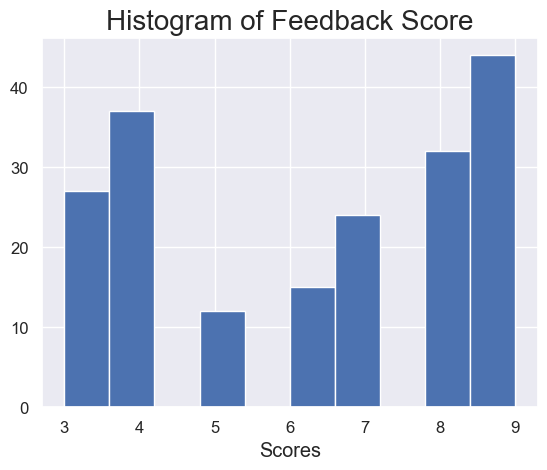

In [46]:
pivot1["Feedback Score"].hist()
plt.title("Histogram of Feedback Score", size=20)
plt.xlabel("Scores")
plt.show()

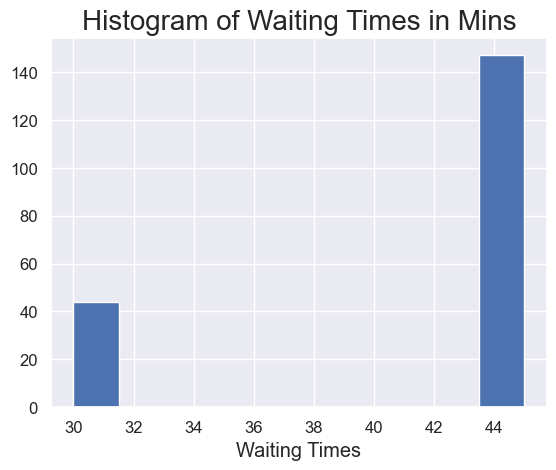

In [47]:
pivot1["WaitTime"].hist()
plt.title("Histogram of Waiting Times in Mins", size=20)
plt.xlabel("Waiting Times")
plt.show()

In [48]:
pivot1["WaitTime"].unique()

array([30., 45.])

In [49]:
df3

,index,ResourceID,Department,ResourceType,UsageHours,Date,Availability
0,0,R5487,Cardiology,Nurse,2,2024-07-28,Available
1,1,R8097,Orthopedics,Doctor,0,2024-09-10,Unavailable
2,2,R2557,General Medicine,Room,0,2024-12-17,Under Maintenance
3,3,R9024,Neurology,Doctor,9,2024-07-09,Available
4,5,R2629,Oncology,Doctor,4,2024-03-06,Available
...,...,...,...,...,...,...,...
202,208,R1385,Pediatric,Doctor,0,2024-03-26,Unavailable
203,209,R8161,General Medicine,Equipment,1,2024-12-19,Available
204,210,R5806,Pediatric,Doctor,8,2024-03-17,Available
205,211,R1560,Pediatric,Technician,6,2024-05-20,Available


In [50]:
df3.groupby("ResourceType")["UsageHours"].mean()

ResourceType
Doctor       4.51
Equipment    2.76
Nurse        3.36
Room         3.76
Technician   4.59
Name: UsageHours, dtype: float64

## Overall Visualization

In [51]:
pivot1.columns

Index(['PatientID', 'Department_x', 'Date', 'Time', 'Status', 'Feedback Score', 'WaitTime', 'Satisfaction Level'], dtype='object')

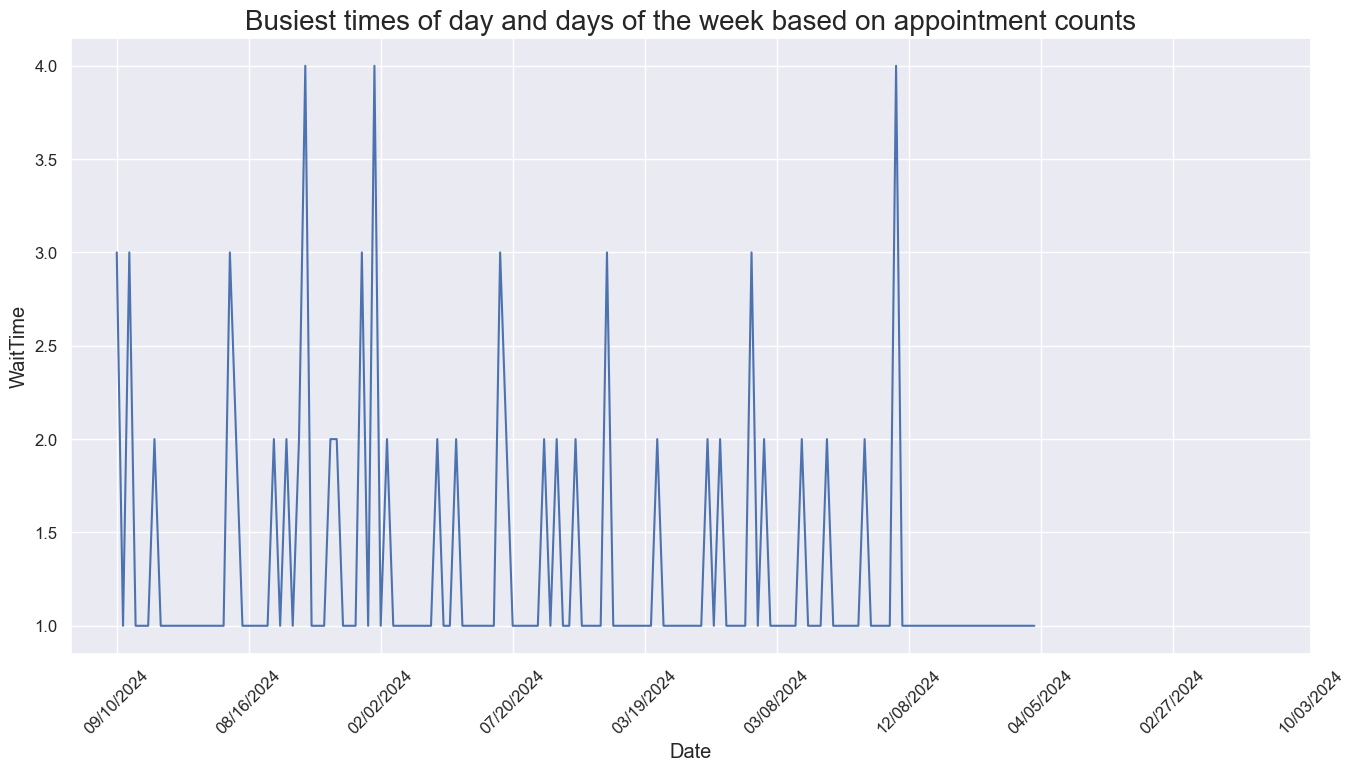

In [52]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(x="Date", y="WaitTime", data=pivot1, estimator='count', ci=None)

plt.title("Busiest times of day and days of the week based on appointment counts", size=20)

# Reduce the number of labels displayed
xticks = np.linspace(0, len(pivot1) - 1, num=10, dtype=int)  # Show only 10 labels
ax.set_xticks(xticks)
ax.set_xticklabels(pivot1["Date"].iloc[xticks], rotation=45)

plt.show()

In [53]:
# Create Clustered Bar Chart

pivot2 = pivot1.pivot_table(index='Department_x', columns='Satisfaction Level', values='PatientID', aggfunc='count')
pivot2

Satisfaction Level,High,Low
Department_x,,
Cardiology,37,2
General Medicine,20,5
Neurology,31,1
Oncology,23,8
Orthopedics,22,7
Pediatric,31,4


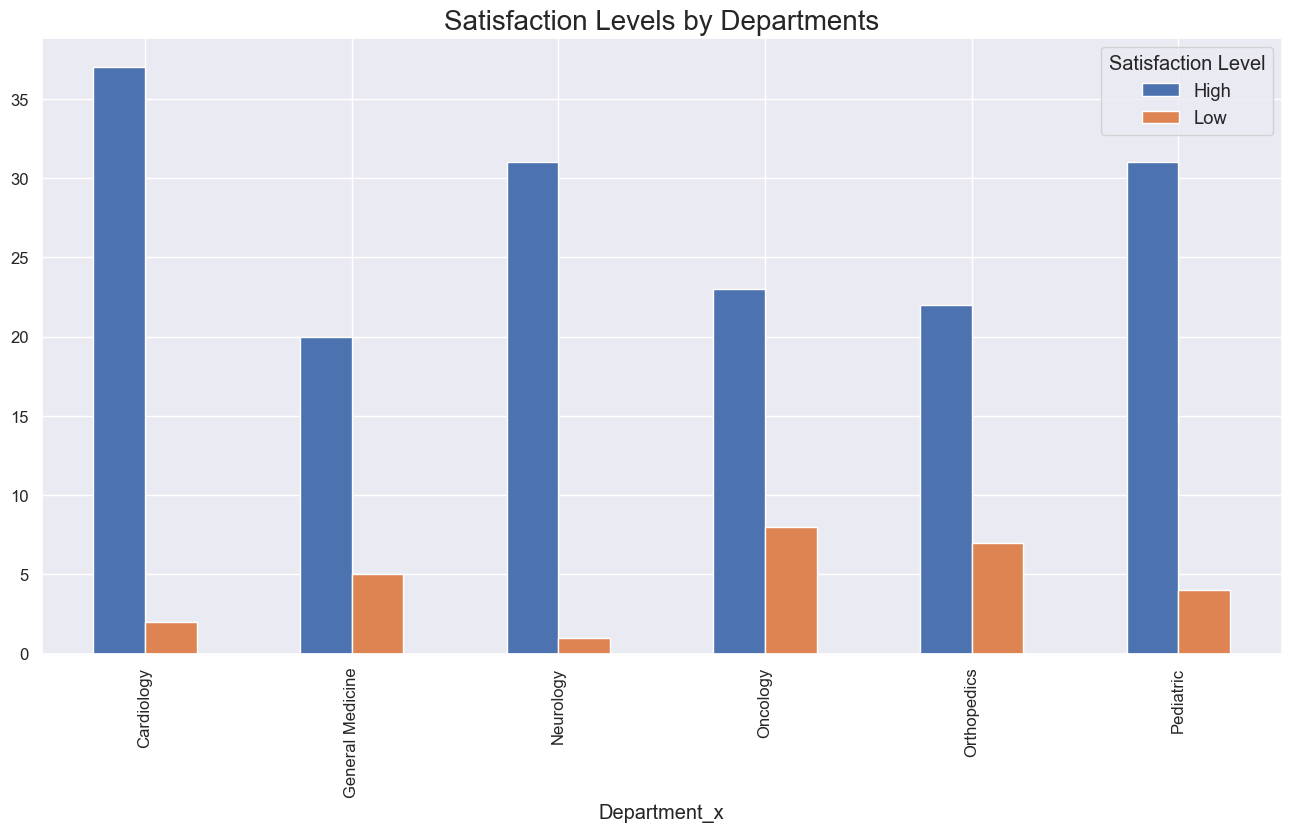

In [54]:
pivot2.plot(kind="bar", figsize=(16,8))

plt.title("Satisfaction Levels by Departments", size=20)
plt.show()

In [55]:
pivot3 = df3.groupby("ResourceType", as_index=True)["UsageHours"].sum()
pivot3

ResourceType
Doctor        194
Equipment     102
Nurse         131
Room          139
Technician    234
Name: UsageHours, dtype: int64

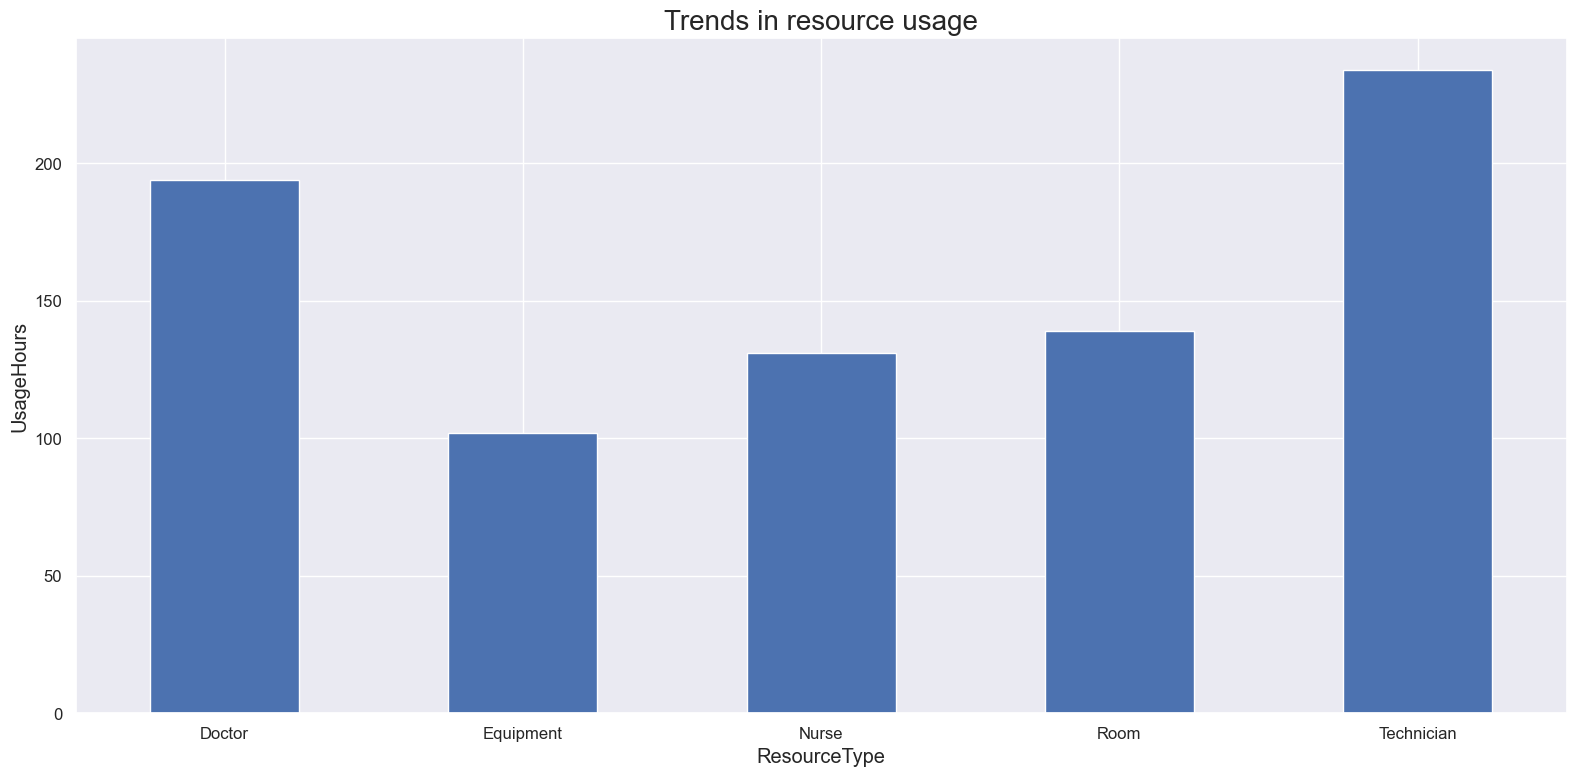

In [56]:
pivot3.plot(kind="bar", figsize=(16,8))

plt.title('Trends in resource usage', size=20)
plt.ylabel('UsageHours')
plt.xlabel('ResourceType')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()